#  Prueba HC 

    
# punto 3 
 

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Prueba_hc/dataset_real_estate.csv')
print(data.shape)
data.head()



(18911, 27)


,id,purchaseCaseId,adjustSquareMeterPrice,automaticACMPrice,finalACMPrice,created_at,garageValue,terraceValue,utilityRoomValue,preofferAcmHigherValue,...,type,stratum,rentValue,garages,garageType,terraceArea,year,zone,latitude,longitude
0,11871,13764,NaN,NaN,NaN,2021-11-01 00:16:29.000,22000000.0,NaN,6000000.0,NaN,...,APA,5.0,NaN,1,NaN,NaN,2013,NaN,4.708366,-74.048910
1,11872,13765,NaN,NaN,NaN,2021-11-01 02:07:35.000,22000000.0,NaN,6000000.0,NaN,...,APA,1.0,NaN,1,NaN,NaN,2012,NaN,4.621316,-74.211773
2,11873,13766,NaN,NaN,NaN,2021-11-01 03:11:48.000,22000000.0,NaN,NaN,NaN,...,CCR,3.0,NaN,1,NaN,NaN,2013,NaN,4.711676,-74.200351
3,11874,13767,NaN,NaN,NaN,2021-11-01 06:46:38.000,22000000.0,NaN,NaN,NaN,...,APA,3.0,NaN,1,NaN,NaN,2001,NaN,6.292523,-75.578972
4,11875,13768,3.530595e+06,2.408969e+08,NaN,2021-11-01 06:51:02.000,22000000.0,NaN,NaN,2.168072e+08,...,APA,3.0,NaN,1,NaN,NaN,1989,NaN,4.765623,-74.044887


# Preprocesamiento de datos 

In [ ]:
data.nunique()


id                        18911
purchaseCaseId            18911
adjustSquareMeterPrice    11036
automaticACMPrice         11044
finalACMPrice              7002
created_at                18886
garageValue                  40
terraceValue               1076
utilityRoomValue             11
preofferAcmHigherValue    10588
preofferAcmLowerValue     10588
area                        269
bathrooms                     6
hasElevator                   2
floor                        37
buildingFloors               41
estateFloors                  3
type                          4
stratum                       6
rentValue                    15
garages                       7
garageType                    4
terraceArea                 109
year                         42
zone                       3351
latitude                  14349
longitude                 14230
dtype: int64

## - exploramos en que periodo de tiempo se encuentra el dataset 

In [ ]:
data_1.created_at.min()


'2021-05-19 10:02:30.000'

In [ ]:
data_1.created_at.max()


'2022-08-04 12:45:25.000'

### - Visualizamos los tipos de propiedad

In [ ]:
data.type.unique()


array(['APA', 'CCR', 'CAS', 'APE'], dtype=object)




### -Contamos la cantidad de propiedades por tipo 

In [ ]:
data['type'].value_counts() 


APA    13087
CAS     3407
CCR     2400
APE       17
Name: type, dtype: int64

## - Obtenemos el porcentaje de cada tipo de propiedad


In [ ]:
data['type'].value_counts(normalize=True) * 100


APA    69.203109
CAS    18.015970
CCR    12.691026
APE     0.089895
Name: type, dtype: float64

### -Después contamos la cantidad de instancias para cada propiedad en este caso podemos ver que entre 'APA','CAS','CCR'  se encuentra concentrada el 99,92 % de los datos, procederemos a crear un filtro para estos tipos de propiedad 


In [ ]:
data_1 = data[data.type.isin(['APA','CAS','CCR'])]
data.shape

(18911, 27)

## -Ahora vamos a explorar en que estratos estan concentradas las propiedades


In [ ]:
data_1['stratum'].value_counts(normalize=True, sort=True) * 100


3.0    44.837124
4.0    22.879533
2.0    18.807621
5.0     8.804548
6.0     3.641672
1.0     1.029502
Name: stratum, dtype: float64

## -Alrededor del 89% de las propiedades que estan disponibles se concentran entre los estratos 2,3 y 4 

In [ ]:
for col in data_1.columns:
  nulos= data_1[col].isna().sum()
  print(col,  "{:.2f}%".format(nulos*100/18911))



id 0.00%
purchaseCaseId 0.00%
adjustSquareMeterPrice 40.17%
automaticACMPrice 40.03%
finalACMPrice 62.86%
created_at 0.00%
garageValue 58.43%
terraceValue 87.48%
utilityRoomValue 72.22%
preofferAcmHigherValue 41.81%
preofferAcmLowerValue 41.81%
area 26.23%
bathrooms 0.00%
hasElevator 25.20%
floor 30.69%
buildingFloors 30.69%
estateFloors 71.17%
type 0.00%
stratum 65.50%
rentValue 99.80%
garages 0.00%
garageType 96.01%
terraceArea 87.36%
year 0.00%
zone 72.23%
latitude 0.00%
longitude 0.00%


## -Observamos que el dataset  tiene una gran cantidad de valores faltantes en multiples columnas esto dado a la variedad de caracteristicas que puede tener las viviendas, aunque el promedio de datos nulos del dataset en general es del 38.87% que es un % alto de valores nulos en un dataset a recomendacion este dataset si va a ser usado para la contruccion de modelos requiere preprocesar con tecnicas de imputacion 

In [ ]:
data_1['hasElevator'].value_counts(normalize=True, sort=True) * 100


1.0    57.467441
0.0    42.532559
Name: hasElevator, dtype: float64

## - vemos entonces que el 57% de las propiedades tiene ascensor 

In [ ]:
data_1.adjustSquareMeterPrice.describe( ).round(2)


count       11298.00
mean      3508418.69
std       1093694.68
min       1229910.19
25%       2755755.61
50%       3324905.65
75%       4059694.78
max      15622451.50
Name: adjustSquareMeterPrice, dtype: float64

## - por otra parte respecto al valor del metro cuadrado vemos que el valor promedio del metro cuadrado esta en $3508418$  con un valor minimo de $1229910$ y una maximo de $15622451$ vamos a ver ahora un mapa de correlacion lineal para ver que variables etsan mas correlacionadas con el precio del metro cuadrado 

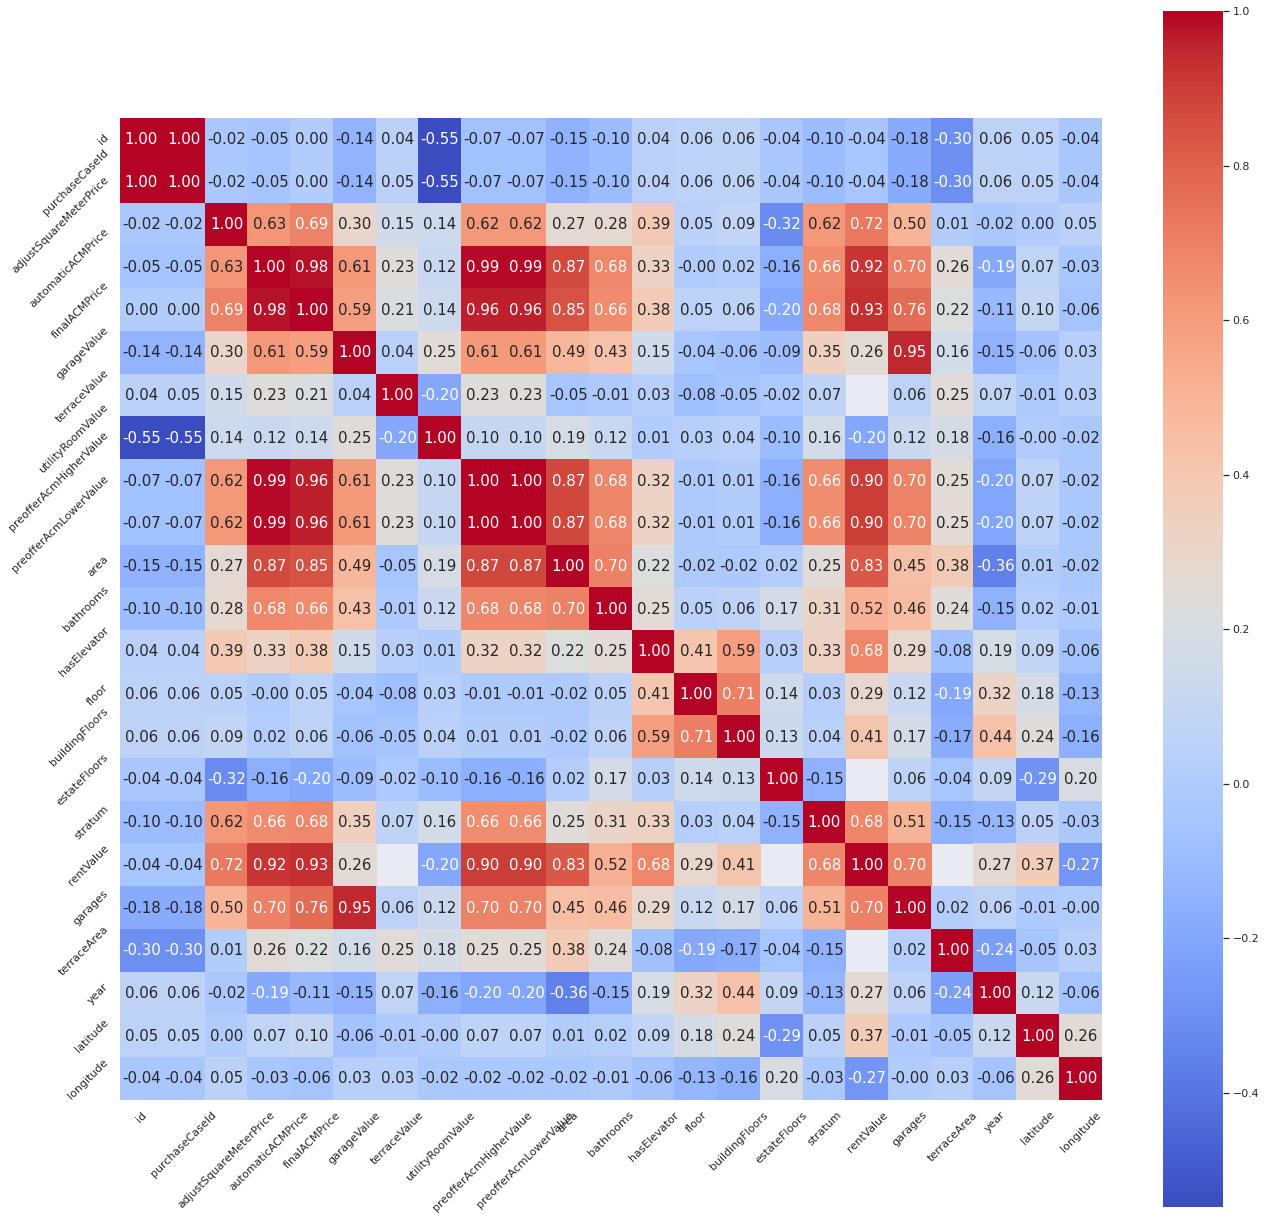

In [ ]:
corr = data_1.corr()
plt.figure(figsize=(22,22))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

## - de este mapa de correlacion podemos inferir del mercado que a parte de los precios establecidos por los vendedores las principales caracteristicas que tienen mas correlacion con el precio del metro cudrado en orden de importyacia son el area , el garage , la cantidad de baños y el estrato en que se encuentra la propiedad , vemos que el ascensor solo tiene 33% de correlacion lineal, sin embargo el ascesor es uno de los factores que ayudan a definir la descicion de compra 

### - Realizamnos un box plot para visualizar como esta distrubudio el valor del precio del metro cuadrado entre el area total de las propiedades

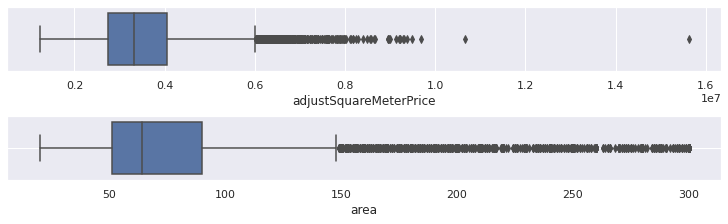

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,3),constrained_layout= True)
sns.boxplot(data=data_1,x="area", ax=ax2)
sns.boxplot(data=data_1,x="adjustSquareMeterPrice", ax=ax1)
plt.grid()
plt.show()

##- Observamos que la media del area este entre los 50mts hasta casi los 100 mts cuadrados y el valor del precio del metro cuadradfo tiene su media entre 3 y 4 millones 